In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [45]:
# Load decoder output
output_traj = np.load('saved_results/decoder_result/_springsLight5output.npy')
target_traj = np.load('saved_results/decoder_result/_springsLight5target.npy')

# Set the simulation index as 4, batch index as 4. You can use other trials. 
traj = output_traj[4,4,:,:,:]

fig, ax = plt.subplots()
ax.set(xlim=(-0.5,0.5), ylim=(-0.5, 0.5))

line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
line3, = ax.plot([], [], lw=2)
line4, = ax.plot([], [], lw=2)
line5, = ax.plot([], [], lw=2)

def animate(time_index):
    line1.set_data(traj[0,:time_index,0], traj[0,:time_index,1])
    line2.set_data(traj[1,:time_index,0], traj[1,:time_index,1])
    line3.set_data(traj[2,:time_index,0], traj[2,:time_index,1])
    line4.set_data(traj[3,:time_index,0], traj[3,:time_index,1])
    line5.set_data(traj[4,:time_index,0], traj[4,:time_index,1])
    return line1,line2,line3,line4,line5

anim = animation.FuncAnimation(fig, animate, frames = target_traj.shape[-2],interval=100)
anim.save("demo_model_out.gif", writer="pillow", dpi=200)

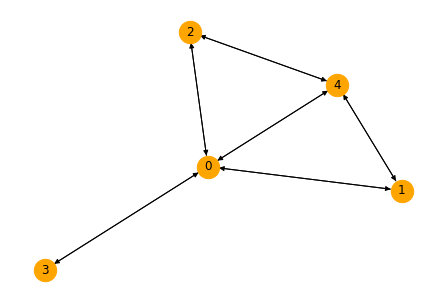

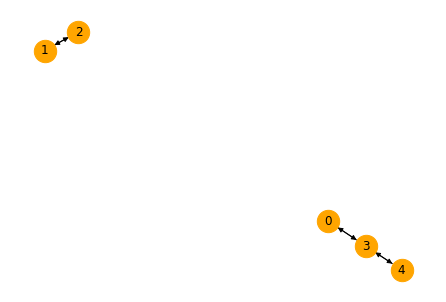

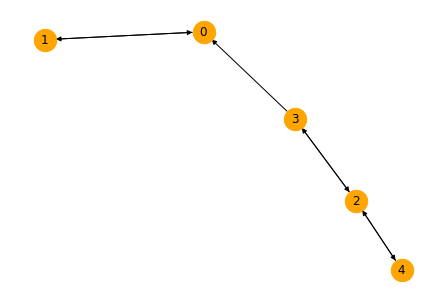

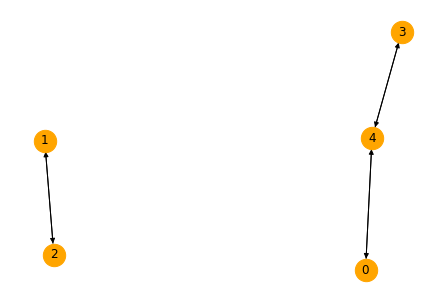

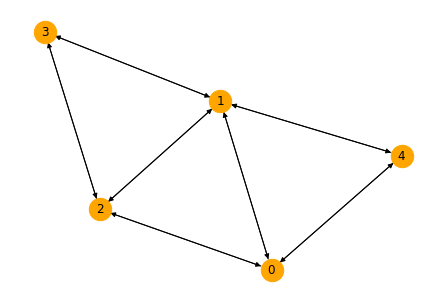

In [27]:
import networkx as nx
enc_edges = np.load('saved_results/encoder_result/_springsLight5.npy')

n_sim_per_batch = 5
n_nodes = 5

# Batch index 0
batch_edges = enc_edges[0]

# Separate sims in one batch
sim_edges = np.split(batch_edges, n_sim_per_batch)

def is_edge(row):
    return 1 if row[0] > row[1] else 0

for edges in sim_edges:
    # Convert edge prediction to label 0 or 1
    t = np.apply_along_axis(is_edge, 1, edges)
    
    # insert 0 to diagonal
    t_new = np.zeros((n_nodes, n_nodes+1))
    t_new[:-1,1:] = t.reshape((n_nodes-1, n_nodes))
    t_new = t_new.reshape(-1)[:-n_nodes].reshape((n_nodes, n_nodes))

    # Construct graph
    G = nx.from_numpy_matrix(t_new, create_using=nx.DiGraph)
    plt.figure()
    nx.draw(G, with_labels=True, node_size=500, node_color='orange')
    # plt.savefig('figures/encoder_graph.png')